# INTEGRATED CA - MACHINE LEARNING AND DATA VISUALISATION

### Student - Linika Almeida, ID - 2023045

### DESCRIPTION

The dataset was collected in the kaggle website. It provides information about Customer Shopping Preferences and offers insights into consumer behavior and purchasing patterns. This dataset provide a range of customer attributes including age, gender, purchase history, preferred payment methods and more.

##### Main Goal
Use the dataset to apply filtering, market basket and make a Dashboard.
______________________

#### The meaning of each column in the data is as below
1. Customer ID - Unique identifier for each customer
2. Age- Age of the customer
3. Gender - Gender of the customer (Male/Female)
4. Item Purchased - The item purchased by the customer
5. Category - Category of the item purchased
6. Purchase Amount (USD) - The amount of the purchase in USD
7. Location - Location where the purchase was made
8. Size - Size of the purchased item
9. Color - Color of the purchased item
10. Season - Season during which the purchase was made
11. Review Rating - Rating given by the customer for the purchased item
12. Subscription Status - Indicates if the customer has a subscription (Yes/No)
13. Shipping Type - Type of shipping chosen by the customer
14. Discount Applied - Indicates if a discount was applied to the purchase (Yes/No)
15. Promo Code Used - Indicates if a promo code was used for the purchase (Yes/No)
16. Previous Purchases - The total count of transactions concluded by the customer at the store, excluding the ongoing transaction
17. Payment Method - Customer's most preferred payment method
18. Frequency of Purchases - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)


Github Repository: 

#### Import Libraries

In [149]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder

import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px

import folium
from ipywidgets import Layout
from ipywidgets import Layout, VBox, HBox

In [215]:
#pip install scikit-surprise

In [216]:
#pip install pandas plotly

In [217]:
#!pip install pandas plotly ipywidgets

In [218]:
#!pip install --upgrade plotly

In [219]:
#pip install dash

In [220]:
#pip install dash[all]

In [221]:
#pip install dash dash-core-components dash-html-components plotly

In [222]:
#pip install folium

In [159]:
# Read dataset
df1 = pd.read_csv('shopping_trends.csv')

I will add some fields in this dataset such as Member Number, Item Quantity and Date to complement the dataset and achieve the requirements requested in this project

In [160]:
# Create new columns
df2 = pd.DataFrame({
    'Member_number': np.random.randint(1000, 2000, 3901),  
    'Item_Quantity': np.random.randint(1, 50, 3901), 
    'Date': pd.date_range(start='2012-01-01', periods=3901, freq='D'),  
})

# Extract date information
df2['year'] = df2['Date'].dt.year
df2['month'] = df2['Date'].dt.month
df2['day'] = df2['Date'].dt.day
df2['day_of_week'] = df2['Date'].dt.day_of_week

In [161]:
# Concat df1 and df2
df = pd.concat([df1, df2], axis=1)

### EXPLORATORY DATA ANALYSIS (EDA)

In the EDA we are going to do some assumptions, do a comprehension of the dataset and check missing values

In [162]:
#Display the first few rows
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Member_number,Item_Quantity,Date,year,month,day,day_of_week
0,1.0,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,...,14.0,Venmo,Fortnightly,1982,7,2012-01-01,2012,1,1,6
1,2.0,19.0,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,...,2.0,Cash,Fortnightly,1921,21,2012-01-02,2012,1,2,0
2,3.0,50.0,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,...,23.0,Credit Card,Weekly,1568,13,2012-01-03,2012,1,3,1
3,4.0,21.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,...,49.0,PayPal,Weekly,1898,1,2012-01-04,2012,1,4,2
4,5.0,45.0,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,...,31.0,PayPal,Annually,1374,21,2012-01-05,2012,1,5,3


In [163]:
#Save new dataset with new columns in a csv file
csv_file_name = 'shopping_trends_complete.csv'
df.to_csv(csv_file_name, index=False)

Lets check some information in this dataset

In [164]:
#Display the summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3901 entries, 0 to 3900
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Customer ID               3900 non-null   float64       
 1   Age                       3900 non-null   float64       
 2   Gender                    3900 non-null   object        
 3   Item Purchased            3900 non-null   object        
 4   Category                  3900 non-null   object        
 5   Purchase Amount (USD)     3900 non-null   float64       
 6   Location                  3900 non-null   object        
 7   Size                      3900 non-null   object        
 8   Color                     3900 non-null   object        
 9   Season                    3900 non-null   object        
 10  Review Rating             3900 non-null   float64       
 11  Subscription Status       3900 non-null   object        
 12  Payment Method      

In [165]:
#Show the number of missing (NaN values) per column
print(df.isnull().sum())

Customer ID                 1
Age                         1
Gender                      1
Item Purchased              1
Category                    1
Purchase Amount (USD)       1
Location                    1
Size                        1
Color                       1
Season                      1
Review Rating               1
Subscription Status         1
Payment Method              1
Shipping Type               1
Discount Applied            1
Promo Code Used             1
Previous Purchases          1
Preferred Payment Method    1
Frequency of Purchases      1
Member_number               0
Item_Quantity               0
Date                        0
year                        0
month                       0
day                         0
day_of_week                 0
dtype: int64


In [166]:
#Show number of unique values per column
df.nunique()

Customer ID                 3900
Age                           53
Gender                         2
Item Purchased                25
Category                       4
Purchase Amount (USD)         81
Location                      50
Size                           4
Color                         25
Season                         4
Review Rating                 26
Subscription Status            2
Payment Method                 6
Shipping Type                  6
Discount Applied               2
Promo Code Used                2
Previous Purchases            50
Preferred Payment Method       6
Frequency of Purchases         7
Member_number                978
Item_Quantity                 49
Date                        3901
year                          11
month                         12
day                           31
day_of_week                    7
dtype: int64

##### In a previous analyse is possible to notice:

In data.info this dataset is distributed in 3901 entries and 25 columns. And there are data with different type, being float64, int32, object and datetime64

In df.type we observed there are datetime64(1), float64(5), int32(6), object(14).

isnull().sum() shows the columns  presents only one line of missing values in this dataset.
___

#### Now I am going to investigate the dataset to get some insigts
* Make some plots
* Check Correlation

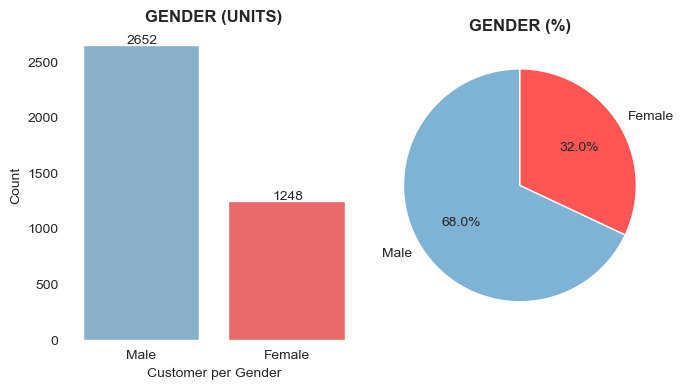

In [167]:
# Set white background
sns.set_style("whitegrid")

# Define colors
colors = ['#7FB3D5', '#FF5555']
sns.set_palette(colors)

# Figure with two plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))
fig.patch.set_facecolor('white')  # Set background color for the figure

# Plot for Heart Stroke Cases
ax1 = sns.countplot(x='Gender', data=df, order=df['Gender'].value_counts().index, ax=axes[0])
ax1.set_title('GENDER (UNITS)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Customer per Gender', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.grid(False)

# Remove border around the bar plot
for spine in ax1.spines.values():
    spine.set_visible(False)

# Display the count values on the bars
for p in ax1.patches:
    ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.30, p.get_height() + 8), fontsize=10)

# Plot Pie chart with percentual for Gender
ax2 = plt.subplot(1, 2, 2)
explode = (0.1, 0) if len(df['Gender'].unique()) == 2 else None
ax2.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%', startangle=90, explode=explode, colors=colors)
ax2.set_title('GENDER (%)', fontsize=12, fontweight='bold')
ax2.set_ylabel('')

# Set background color for the subplot
ax2.set_facecolor('white')

# Show plot
plt.tight_layout()
plt.show()


In the graphic above the number of coustumer per gender is equivalent 68% for Male and 32% for Female

In [168]:
# Count the frequency of each unique Category
category_counts = df['Category'].value_counts()

# Get the 4 most common Category
top_4_category = category_counts.head(4)

# Print the results
print("The 5 most common category are:")
print(top_4_category)

The 5 most common category are:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


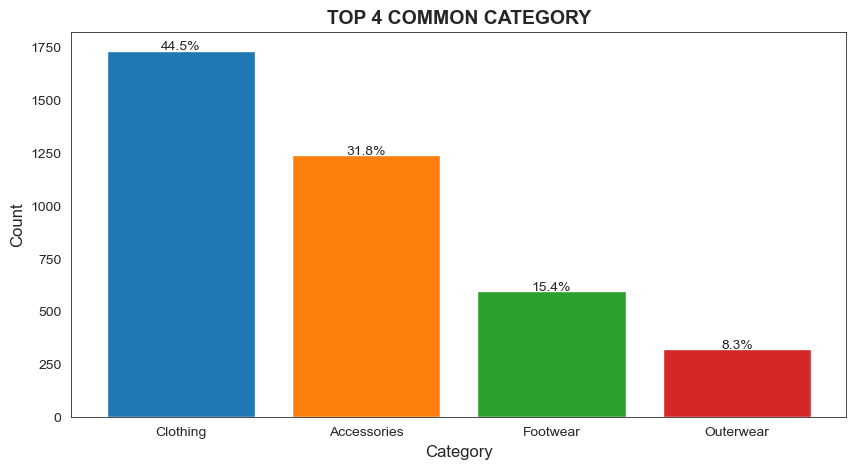

In [169]:
# Create a Pareto chart
plt.figure(figsize=(10, 5))

# Define a list of distinct colors (colorblind-friendly)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create the Pareto chart with custom colors
for i, (Category, count) in enumerate(zip(top_4_category.index, top_4_category.values)):
    plt.bar(Category, count, color=colors[i])
    
    # Add percentage on top of each bar
    percentage = (count / top_4_category.sum()) * 100
    plt.text(Category, count + 1, f'{percentage:.1f}%', ha='center', fontsize=10, fontweight='normal')

plt.xlabel('Category', fontsize=12, fontweight='normal', fontname='Arial')
plt.ylabel('Count', fontsize=12, fontweight='normal', fontname='Arial')
plt.title('TOP 4 COMMON CATEGORY', fontsize=14, fontweight='bold', fontname='Arial')
plt.xticks(rotation=45, ha='right')

# Remove the grid lines
plt.grid(False)

# Rotate the x-axis labels
plt.xticks(rotation=0, ha='center')

# Add a border around the figure
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.5)
    spine.set_color('black')

plt.show()

The plot show the most commum category, being in first place of purchased for the customer the Category of Chothing with 44.5%, followed by Acessories, Footwear and in the last position Outerwear with 8.3%.

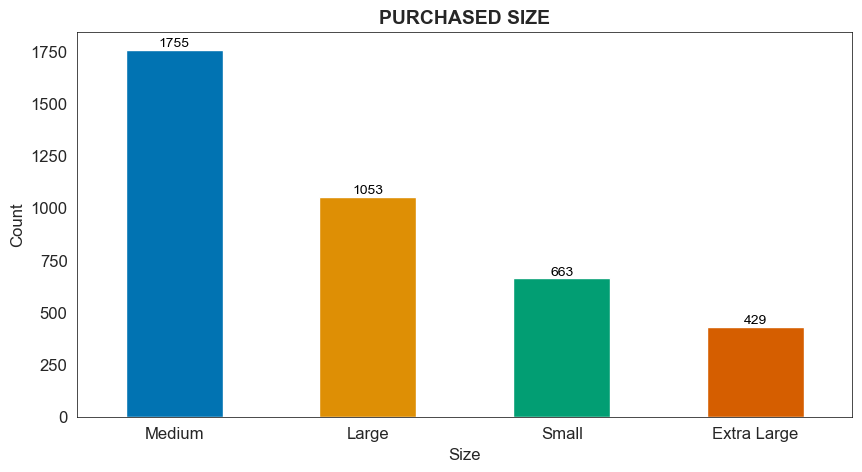

In [170]:
#Plot the purchased size

# Assuming 'Size' is a categorical variable 
size_counts = df['Size'].value_counts()

# Use a Seaborn color palette
colors = sns.color_palette('colorblind', len(size_counts))

#Define figure
plt.figure(figsize = (10, 5))
ax = df['Size'].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Medium', 'Large', 'Small', 'Extra Large'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 12)

plt.xlabel('Size', fontsize=12, fontweight='normal', fontname='Arial')
plt.ylabel('Count', fontsize=12, fontweight='normal', fontname='Arial')
plt.title('PURCHASED SIZE', fontsize=14, fontweight='bold', fontname='Arial')
plt.xticks(rotation=45, ha='right')

# Remove the grid lines
plt.grid(False)

# Rotate the x-axis labels
plt.xticks(rotation=0, ha='center')

# Add a border around the figure
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.5)
    spine.set_color('black')

plt.show()

The most purchased size is Medium, followed by Large, Small and in the last position Extra large

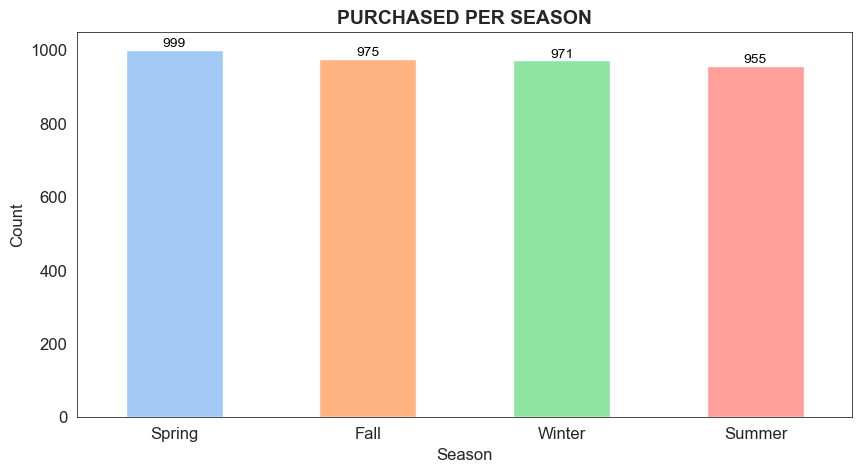

In [171]:
#Plot the purchased size

# Assuming 'Size' is a categorical variable 
season_counts = df['Season'].value_counts()

# Use a Seaborn color palette
colors = sns.color_palette('pastel', len(season_counts))

#Define figure
plt.figure(figsize = (10, 5))
ax = df['Season'].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Spring', 'Fall', 'Winter', 'Summer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 12)

plt.xlabel('Season', fontsize=12, fontweight='normal', fontname='Arial')
plt.ylabel('Count', fontsize=12, fontweight='normal', fontname='Arial')
plt.title('PURCHASED PER SEASON', fontsize=14, fontweight='bold', fontname='Arial')
plt.xticks(rotation=45, ha='right')

# Remove the grid lines
plt.grid(False)

# Rotate the x-axis labels
plt.xticks(rotation=0, ha='center')

# Add a border around the figure
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.5)
    spine.set_color('black')

plt.show()

Customers usually shopping more during the spring and fall season, and during the summer do less shopping